In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0
control_sd = 0.21

# Experimental group
experimental_mean = 0.17
experimental_sd = 0.21

#Set the number of simulations for our test = 1000
n_sim = 1000

You can now start running our simulations to run an independance t-test with above data and store the calculated p_value in our p array. Perform following tasks.

Initialize a numpy array and fill it with Nan values for storing the results (p_value) of the independance T-test.

For defined number of simulations (i.e. 1000), do the following:

Generate a random normal variable with control mean and sd
Generate a random normal variable with experimental mean and sd
Run and independant t-test using control and experimental data
Store the p value for each test
Calculate the total number and overall proportion of simulations and where Null hypothesis is rejected

In [3]:
# For reproducability 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim

for s in range(n_sim):

    control = np.random.normal(loc= control_mean, scale=control_sd, size=sample_size)
    
    experimental = np.random.normal(loc= experimental_mean, scale=experimental_sd, size=sample_size)
    
    t_test = stats.ttest_ind(control, experimental)
    
    p[s] = t_test[1]

# number of null hypothesis rejections
num_null_rejects = np.sum(p < 0.05)
power = num_null_rejects/float(n_sim)

power

0.495

Often in behavioral research .8 is accepted as a sufficient level of power.

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of .17 or greater between the group means with an 80% power.

In [4]:
from statsmodels.stats.power import TTestPower

In [5]:
power = TTestPower()

In [6]:
power.solve_power(effect_size=.17, alpha=0.05, power=.8)

273.51381725963785

In [7]:
target = 0.8

In [8]:
# minimum sample size to start the simulations 
sample_size = 12
null_rejected = 0
n_sim = 10000

As above, perform the following

Initialize an empty array for storing results
initiliaze a list for storing samplesize x power summary
While current power is less than target power
Generate distributions for control and experimental groups using given statistics (as before)
Run a t-test and store results
Calculate current power
Output current sample size and power calculated for inspection
Store results: Sample size , power
increase the sample size by 1 and repeat

In [9]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

# keep iterating until desired power is obtained

power_sample = []
while null_rejected < target:

    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)
    
    # For control group 
    # Here we specify size=[n_sim, sample_size] which creates an array of n_sim number of arrays,
    # each containing sample_size number of elements. 
    # This is equivalent to manually looping n_sim times like we did above but is much faster.
    data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    
    # For experimental group
    data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            
    
    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
                                
    p_vals = result[1]

    #Since you know that all simulations are from a different distribution \
    #all those that rejected the null-hypothesis are valid
    null_rejected = np.sum(p_vals < 0.05) / n_sim

    print("Number of Samples:", sample_size,", Calculated Power =", null_rejected)
    power_sample.append([sample_size, null_rejected])

    # increase the number of samples by one for the next iteration of the loop
    sample_size += 1

Number of Samples: 12 , Calculated Power = 0.4754
Number of Samples: 13 , Calculated Power = 0.5066
Number of Samples: 14 , Calculated Power = 0.5423
Number of Samples: 15 , Calculated Power = 0.5767
Number of Samples: 16 , Calculated Power = 0.6038
Number of Samples: 17 , Calculated Power = 0.6297
Number of Samples: 18 , Calculated Power = 0.658
Number of Samples: 19 , Calculated Power = 0.6783
Number of Samples: 20 , Calculated Power = 0.7056
Number of Samples: 21 , Calculated Power = 0.7266
Number of Samples: 22 , Calculated Power = 0.7481
Number of Samples: 23 , Calculated Power = 0.7624
Number of Samples: 24 , Calculated Power = 0.7864
Number of Samples: 25 , Calculated Power = 0.8031


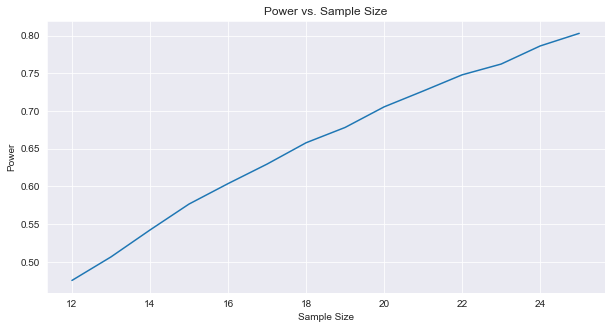

In [10]:
# Plot a sample size X Power line graph 

plt.figure(figsize=(10,5))
plt.title('Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')

ans = power_sample
df = pd.DataFrame(ans, index=None)
plt.plot(df[0], df[1])

plt.show()